# Date Time data type issues in pandas

In [2]:
import numpy as np
import pandas as pd

## Convert number to date
**Strings** similar to ISO date time is easy by built-in pandas **astype('datetime64[D]')** conversion. Number is in **partial format**, not so simple.

In [3]:
d = pd.DataFrame([['a',1,'2016-11',201611],['b',2,'2017-01',201701]],
                      columns=['x','y','iso','ym'])
print(d,'\n\n',d.dtypes)

   x  y      iso      ym
0  a  1  2016-11  201611
1  b  2  2017-01  201701 

 x      object
y       int64
iso    object
ym      int64
dtype: object


In [5]:
dc = d.astype({'iso':'datetime64[D]', 'ym':'datetime64'})
print(dc,'\n\n',dc.dtypes)

   x  y        iso                            ym
0  a  1 2016-11-01 1970-01-01 00:00:00.000201611
1  b  2 2017-01-01 1970-01-01 00:00:00.000201701 

 x              object
y               int64
iso    datetime64[ns]
ym     datetime64[ns]
dtype: object


C:\usr\bin\Anaconda2\envs\py3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [6]:
# type information is lost in csv
dc.to_csv('test.csv')
dc2 = pd.read_csv('test.csv',index_col=0)
print(dc2,'\n')
print('**** notice datetime64 type loss')
print(dc.dtypes,'\n\n',dc2.dtypes)

   x  y                            iso                             ym
0  a  1  2016-11-01 00:00:00.000000000  1970-01-01 00:00:00.000201611
1  b  2  2017-01-01 00:00:00.000000000  1970-01-01 00:00:00.000201701 

**** notice datetime64 type loss
x              object
y               int64
iso    datetime64[ns]
ym     datetime64[ns]
dtype: object 

 x      object
y       int64
iso    object
ym     object
dtype: object


In [ ]:
## SKIP THAT
# hdf implisitly requires python3-tables
import tables
# type information is lost in HDF5
dc.to_hdf('test.h5', 'df')
dc2 = pd.read_hdf('test.h5',index_col=0)

If you can find format template = good! **number int64.astype(str) -> format -> date**

In [7]:
df = d.copy()
print(df['ym'],'\n')
df['t_ym'] = pd.to_datetime(df['ym'], format='%Y%m')
print(df,'\n\n',d.dtypes)

0    201611
1    201701
Name: ym, dtype: int64 

   x  y      iso      ym       t_ym
0  a  1  2016-11  201611 2016-11-01
1  b  2  2017-01  201701 2017-01-01 

 x      object
y       int64
iso    object
ym      int64
dtype: object


 Another way to deal with number coded data is to split it into YMD parts by **.str.slice()**.

In [8]:
# Can only use Series.str accessor with string values, which use np.object_ dtype in pandas
# NOT d['ym'].str.slice(0,4,1)
df['year'] = df['ym'].astype(str).str.slice(0,4,1)
df

,x,y,iso,ym,t_ym,year
0,a,1,2016-11,201611,2016-11-01,2016
1,b,2,2017-01,201701,2017-01-01,2017


In [9]:
df.to_csv('data.csv')

## Set **time as index**. 

In [10]:
df = pd.read_csv('data.csv', index_col=0,parse_dates=['t_ym'])
df

,x,y,iso,ym,t_ym,year
0,a,1,2016-11,201611,2016-11-01,2016
1,b,2,2017-01,201701,2017-01-01,2017


In [11]:
df.dtypes

x               object
y                int64
iso             object
ym               int64
t_ym    datetime64[ns]
year             int64
dtype: object

In [12]:
d = df.set_index('t_ym')
d

,x,y,iso,ym,year
t_ym,,,,,
2016-11-01,a,1,2016-11,201611,2016
2017-01-01,b,2,2017-01,201701,2017


In [13]:
d.index

DatetimeIndex(['2016-11-01', '2017-01-01'], dtype='datetime64[ns]', name='t_ym', freq=None)

### Does TimeIndex help to simplify code?

In [43]:
d = pd.read_csv('data.csv',parse_dates=['t_ym'],index_col='t_ym')
print(type(d))
print(type(d['x']))
print(type(d[['x','y']])) # note double [[.,.]]
d

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,x,y,iso,ym,year
t_ym,,,,,,
2016-11-01,0,a,1,2016-11,201611,2016
2017-01-01,1,b,2,2017-01,201701,2017


In [44]:
Y_ym =d[['y']].groupby('t_ym')
Y_ym

In [45]:
Y_ym.head() # GroupBy object

,y
t_ym,
2016-11-01,1
2017-01-01,2


In [46]:
ys = Y_ym.sum() # DataFrame
print(type(ys))
print(ys.dtypes)
ys

<class 'pandas.core.frame.DataFrame'>
y    int64
dtype: object


,y
t_ym,
2016-11-01,1
2017-01-01,2


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

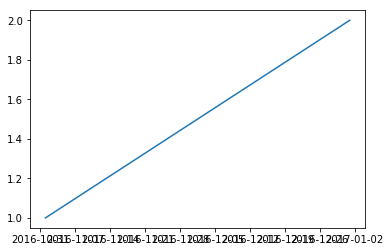

In [48]:
plt.plot(ys)

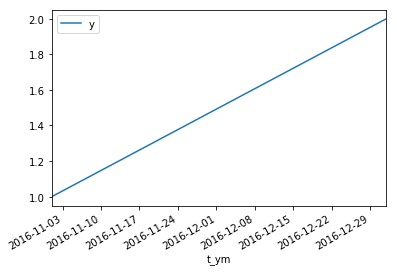

In [49]:
ys.plot()

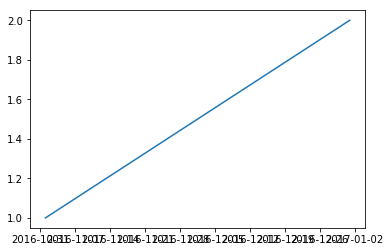

In [50]:
plt.plot(ys)

In [51]:
ys = ys.reset_index()
ys

,t_ym,y
0,2016-11-01,1
1,2017-01-01,2


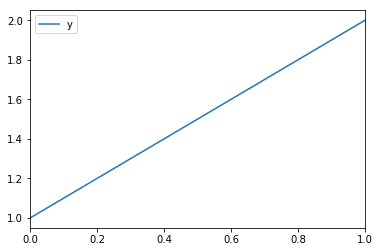

In [52]:
ys.plot()

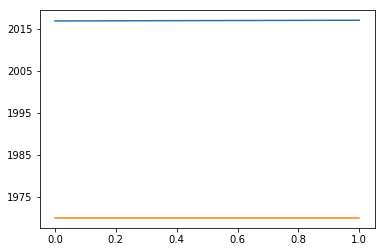

In [53]:
plt.plot(ys)